In [155]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [156]:
data = pd.read_csv("Cardiac.csv")

<IPython.core.display.Javascript object>

In [157]:
data.shape

(889, 13)

<IPython.core.display.Javascript object>

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

In [159]:
data.duplicated().sum()

789

<IPython.core.display.Javascript object>

In [160]:
data.head(5)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

In [161]:
data.tail()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
885,Male,0,1,0,1,0,0,0,1,0,0,0,no
886,Male,0,0,1,1,0,0,0,1,0,0,0,yes
887,Female,0,1,0,0,0,0,1,1,0,0,0,no
888,Male,1,1,0,1,0,0,0,1,0,0,0,yes


<IPython.core.display.Javascript object>

In [162]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Gender                            0.000
Chain_smoker                      0.000
Consumes_other_tobacco_products   0.000
HighBP                            0.000
Obese                             0.000
Diabetes                          0.000
Metabolic_syndrome                0.000
Use_of_stimulant_drugs            0.000
Family_history                    0.000
History_of_preeclampsia           0.000
CABG_history                      0.000
Respiratory_illness               0.000
UnderRisk                         0.000
dtype: float64

<IPython.core.display.Javascript object>

In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

In [171]:
data['UnderRisk'] = data['UnderRisk'].replace({'yes': 1 , 'no': 0})

<IPython.core.display.Javascript object>

In [172]:
data['UnderRisk']

0      0
1      0
2      0
3      0
4      0
      ..
884    0
885    0
886    1
887    0
888    1
Name: UnderRisk, Length: 889, dtype: int64

<IPython.core.display.Javascript object>

In [173]:
data['UnderRisk'].value_counts(normalize = True)

0   0.786
1   0.214
Name: UnderRisk, dtype: float64

<IPython.core.display.Javascript object>

In [166]:
data.head(5)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,0
1,Male,0,1,0,1,0,0,0,1,0,0,0,0
2,Male,0,1,0,1,0,0,0,1,0,0,0,0
3,Male,0,1,0,1,0,0,0,1,0,0,0,0
4,Male,0,0,0,0,0,1,1,0,0,0,0,0


<IPython.core.display.Javascript object>

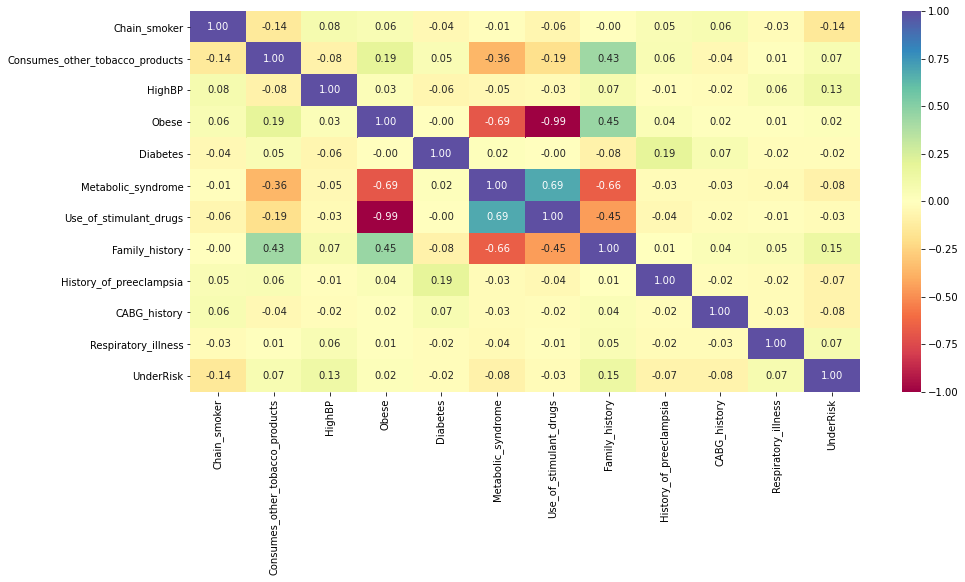

<IPython.core.display.Javascript object>

In [168]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [139]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [140]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<IPython.core.display.Javascript object>

In [175]:
# Separating target variable and other variables
X = data.drop(columns="UnderRisk", axis=1)
X = pd.get_dummies(X, drop_first = True)

Y = data["UnderRisk"]

<IPython.core.display.Javascript object>

In [178]:
X_temp, X_test, y_temp, y_test = train_test_split( X, Y, test_size=0.2, random_state=1, stratify=Y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split( X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


<IPython.core.display.Javascript object>

In [181]:

X_train=pd.get_dummies(X_train,drop_first=True)

X_val = pd.get_dummies(X_val,drop_first=True) 

X_test=pd.get_dummies(X_test,drop_first=True)

print(X_train.shape,X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


<IPython.core.display.Javascript object>

In [184]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


Before UpSampling, counts of label '1': 114
Before UpSampling, counts of label '0': 419 



<IPython.core.display.Javascript object>

In [196]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [198]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [190]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state=1)
lr1.fit(X_train,y_train) 

model_performance_classification_sklearn(lr1, X_train, y_train)
 


,Accuracy,Recall,Precision,F1
0,0.788,0.035,0.571,0.066


<IPython.core.display.Javascript object>

In [192]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1) #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

lr2 = LogisticRegression(random_state=1)
lr2.fit(X_train_over,y_train_over)

model_performance_classification_sklearn(lr2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.673,0.773,0.644,0.703


<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import BaggingClassifier



In [193]:
bag = BaggingClassifier(random_state=1)
bag.fit(X_train_over, y_train_over)

model_performance_classification_sklearn(bag, X_val, y_val)


,Accuracy,Recall,Precision,F1
0,0.573,0.605,0.274,0.377


<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [195]:
confusion_matrix(y_train, rf.predict(X_train))

array([[407,  12],
       [ 94,  20]], dtype=int64)

<IPython.core.display.Javascript object>

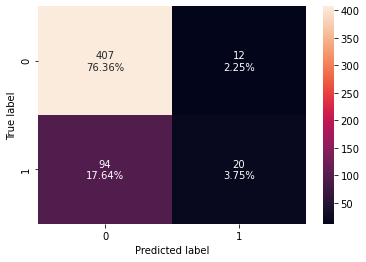

<IPython.core.display.Javascript object>

In [201]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

<IPython.core.display.Javascript object>

In [203]:
models = [] # Empty list to store all the models

<IPython.core.display.Javascript object>

In [204]:
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("LR", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

<IPython.core.display.Javascript object>

In [205]:
results = [] # Empty list to store all model's CV scores
names = [] # Empty list to store name of the models

<IPython.core.display.Javascript object>

In [206]:
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")


Cross-Validation Performance:



<IPython.core.display.Javascript object>

In [207]:
for name, model in models:
     scoring = "recall"
     kfold = StratifiedKFold(
     n_splits=5, shuffle=True, random_state=1
     ) # Setting number of splits equal to 5
     cv_result = cross_val_score(
     estimator=model, X=X_train_over, y=y_train_over, scoring=scoring,       cv=kfold
     )
     results.append(cv_result)
     names.append(name)
     print("{}: {}".format(name, cv_result.mean() * 100))

Bagging: 78.2788296041308
Random forest: 78.04360298336202
LR: 76.61503155479059
dtree: 77.80263912794034


<IPython.core.display.Javascript object>

In [208]:
results

[array([0.77380952, 0.80952381, 0.70238095, 0.77108434, 0.85714286]),
 array([0.77380952, 0.80952381, 0.69047619, 0.78313253, 0.8452381 ]),
 array([0.78571429, 0.71428571, 0.71428571, 0.78313253, 0.83333333]),
 array([0.76190476, 0.80952381, 0.70238095, 0.77108434, 0.8452381 ])]

<IPython.core.display.Javascript object>

In [209]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

<IPython.core.display.Javascript object>

In [210]:
# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
 "n_estimators": np.arange(10, 110, 10),
 "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
 "base_estimator": [
 DecisionTreeClassifier(max_depth=1, random_state=1),
 DecisionTreeClassifier(max_depth=2, random_state=1),
 DecisionTreeClassifier(max_depth=3, random_state=1),
 ],
}

<IPython.core.display.Javascript object>

In [211]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

In [214]:
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9642857142857142:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)



<IPython.core.display.Javascript object>

In [219]:
model1 = AdaBoostClassifier(random_state=1)
model1.fit(X_train_un, y_train_un)




AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [220]:
model2 = AdaBoostClassifier(random_state=1)
model2.fit(X_train_over, y_train_over)


AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [218]:
model_performance_classification_sklearn(model1, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.706,0.842,0.662,0.741


<IPython.core.display.Javascript object>

In [221]:
model_performance_classification_sklearn(model2, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.669,0.785,0.638,0.704


<IPython.core.display.Javascript object>

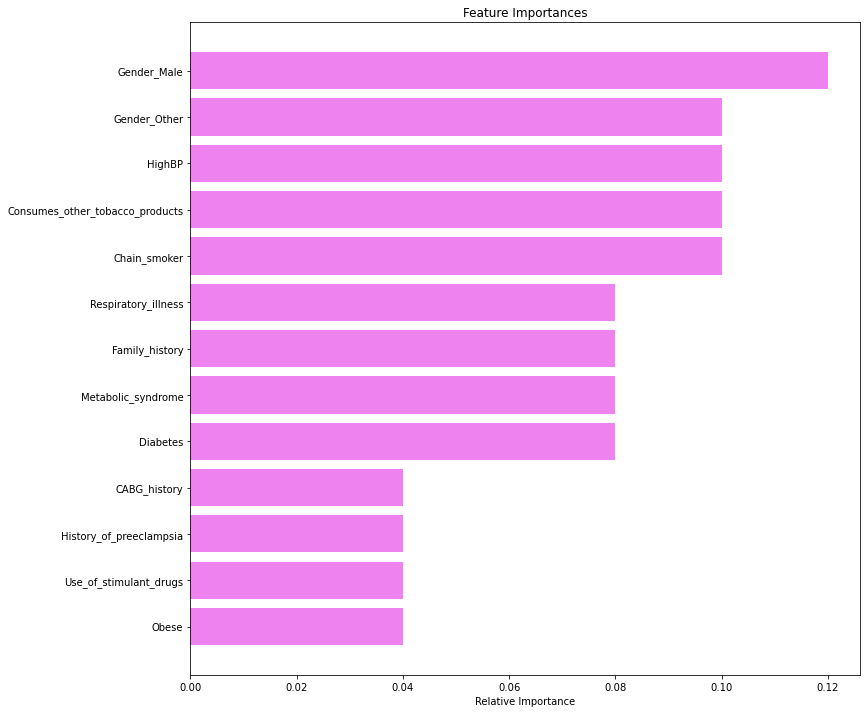

<IPython.core.display.Javascript object>

In [225]:
import matplotlib.pyplot as plt

model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train_un, y_train_un)


feature_names = X_train.columns
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


